In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# filename = 'data/myfile.csv'
filename = 'data/crimes.csv'
# df = pd.read_csv(filename, encoding='utf-8')
df = pd.read_csv(filename, encoding='unicode_escape', header=1)


In [10]:
# print(df.head())
print(df.columns)

viranomaiset = df['Viranomainen'].unique()
rikokset = df['Päärikos tai muu asia'].unique()

print(viranomaiset)
print(rikokset)

# Sum all columns that start with 'Kesto' and add them to a new column 'Kesto yhteensä'
df['Kesto yhteensä'] = df.filter(regex='Kesto').sum(axis=1)
df.sort_values(by='Kesto yhteensä', ascending=False, inplace=True)

df['Kesto yhteensä'].describe()


Index(['Vuosi', 'Pakkokeino', 'Viranomainen', 'Päärikos tai muu asia',
       'Kesto alle 1 vrk', 'Kesto 1-1,9 vrk', 'Kesto 2-2,9 vrk',
       'Kesto 3-3,9 vrk', 'Kesto 4-4,9 vrk', 'Kesto 5-5,9 vrk',
       'Kesto 6-6,9 vrk', 'Kesto 1-1,9 viikkoa', 'Kesto 2-2,9 viikkoa',
       'Kesto 3 viikkoa', 'Kesto 1-1,9 kk', 'Kesto 2-2,9 kk',
       'Kesto 3 kk ja yli', 'Kesto ei tietoa', 'Kiinniotto vrk:t',
       'Pidätys vrk:t', 'Vankeus vrk:t', 'Ulkomaalaisen säilössäpito vrk:t',
       'Kesto yhteensä'],
      dtype='object')
['Viranomaiset yhteensä' 'Helsingin poliisilaitos'
 'Sisä-Suomen poliisilaitos' 'Itä-Uudenmaan poliisilaitos'
 'Lounais-Suomen poliisilaitos' 'Itä-Suomen poliisilaitos'
 'Oulun poliisilaitos' 'Pohjanmaan poliisilaitos' 'Hämeen poliisilaitos'
 'Länsi-Uudenmaan poliisilaitos' 'Kaakkois-Suomen poliisilaitos'
 'Lapin poliisilaitos' 'Keskusrikospoliisi' 'Ahvenanmaan poliisilaitos']
['Rikokset, rikkomukset ja viranomaisten tehtävät yhteensä'
 'RIKOKSET JA RIKKOMUKSET YHTEENSÄ

count    15120.000000
mean       224.639683
std       2246.882764
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max      90558.000000
Name: Kesto yhteensä, dtype: float64

/tmp/ipykernel_2506411/2369875625.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_viranomaiset = df[df['Viranomainen'] != 'Viranomaiset yhteensä'].groupby('Viranomainen').sum()


<AxesSubplot: title={'center': 'Viranomaisten rikosten kestot yhteensä'}, xlabel='Viranomainen'>

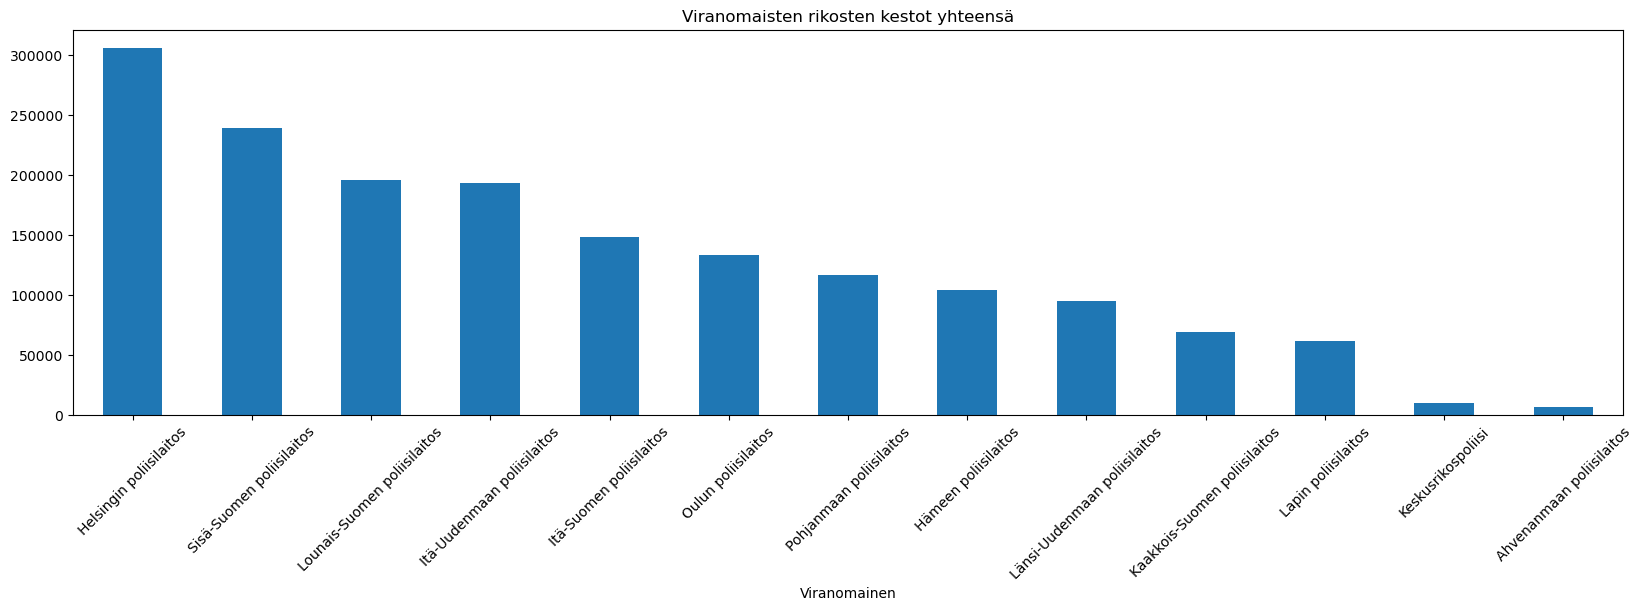

In [12]:
df_viranomaiset = df[df['Viranomainen'] != 'Viranomaiset yhteensä'].groupby('Viranomainen').sum()
# df_viranomaiset['Kesto yhteensä'].plot(kind='bar', title='Viranomaisten rikosten kestot yhteensä', figsize=(20, 5), rot=45)
df_viranomaiset['Kesto yhteensä'].sort_values(ascending=False).plot(kind='bar', title='Viranomaisten rikosten kestot yhteensä', figsize=(20, 5), rot=45)

In [17]:
# 2D Heatmap matrix of Viranomaiset (rows) and Päärikos tai muu asia (columns) with value coming from Kesto yhteensä
df_heatmap = df[df['Viranomainen'] != 'Viranomaiset yhteensä'][['Kesto yhteensä', 'Viranomainen', 'Päärikos tai muu asia']].groupby(['Viranomainen', 'Päärikos tai muu asia']).sum()

# Set Viranoimaiset as index and Päärikos tai muu asia as columns
df_heatmap = df_heatmap.unstack(level=1)
df_heatmap.columns = df_heatmap.columns.droplevel(0)

# Retain top K columns with most values for each row
K = 10
df_heatmap




Päärikos tai muu asia,1 RIKOSLAKIRIKOKSET,11 Omaisuusrikokset,11011 Varkaus 28:1,11012 Törkeä varkaus 28:2,11013 Näpistys 28:3,"1102 Kätkemisrikos, tuottamuksellinen kätkemisrikos,kätkemisrikkomus, rahanpesu 32:1,4,5,6,9,10","1103 Törkeä kätkemisrikos, törkeä rahanpesu 32:2,7,8",1104 Ammattimainen kätkemisrikos 32:3,"1105 Luvaton käyttö, lievä luvaton käyttö 28:7,9",1106 Törkeä luvaton käyttö 28:8,...,308 Tutkinta liiketoimintakiellon määräämiseksi,309 Tutkinta rikoksentekijän luovutusmenettelyssä,310 Lähestymiskieltoasia,312 Virka-apu,313 Päihtymyksen takia säilöönotetut,314 Ulkomaalaisasiat,315 Matkustuskiellon rikkominen,316 Muu asia,RIKOKSET JA RIKKOMUKSET YHTEENSÄ,"Rikokset, rikkomukset ja viranomaisten tehtävät yhteensä"
Viranomainen,,,,,,,,,,,,,,,,,,,,,
Ahvenanmaan poliisilaitos,1254,360,186,42,0,0,0,0,0,0,...,0,0,0,90,0,12,42,0,1254,1398
Helsingin poliisilaitos,55344,21336,8646,1464,54,210,186,0,54,0,...,0,0,0,3372,0,5838,222,162,55350,64944
Hämeen poliisilaitos,19884,7578,3570,744,6,138,42,0,12,0,...,0,0,0,1248,0,324,12,24,19884,21492
Itä-Suomen poliisilaitos,28092,7644,3192,846,24,78,12,0,0,0,...,0,0,0,1998,0,372,48,270,28092,30780
Itä-Uudenmaan poliisilaitos,36264,13896,5988,1230,24,180,126,12,54,0,...,0,0,0,3144,0,774,60,48,36270,40296
Kaakkois-Suomen poliisilaitos,12900,4080,1950,648,12,18,0,0,24,0,...,0,0,0,1248,0,360,108,0,12900,14616
Keskusrikospoliisi,1938,222,0,0,0,0,24,0,0,0,...,0,96,0,18,0,6,0,6,1938,2064
Lapin poliisilaitos,11430,2820,1092,360,12,12,0,0,6,0,...,0,0,0,1110,0,378,18,0,11430,12936
Lounais-Suomen poliisilaitos,36894,12666,6102,1182,72,156,108,0,24,0,...,0,0,0,1794,0,1824,234,24,36894,40770


In [ ]:
fig_heatmap, ax = plt.subplots(figsize=(200, 10))
sns.heatmap(df_heatmap, annot=True, ax=ax, cmap='YlGnBu', fmt='g', linewidths=.5, cbar=False)

In [ ]:
# Plot each Viranomainen on the map of Finland
# https://www.karttapaikka.fi/avoindata
# https://www.karttapaikka.fi/avoindata/avoindata.html
# https://www.karttapaikka.fi/avoindata/avoindata.html#viranomaiset
# https://www.karttapaikka.fi/avoindata/avoindata.html#viranomaiset
# https://www.karttapaikka.fi/avoindata/avoindata.html